In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
%config InlineBackend.figure_format = 'retina'

In [15]:
det_cats = {
    'pz_rot28' : pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn.csv'),
    'pz_act_found2_22' : pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_act_found2_22_thr0.1_step8_no_fn.csv'),
    'pz_all_found34' : pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv')
}

In [16]:
true_cats = {
    'planck_z' : pd.read_csv('/home/rt2122/Data/clusters/planck_z.csv'),
    'MCXC' : pd.read_csv('/home/rt2122/Data/original_catalogs/csv/MCXC.csv'),
    'ACT' : pd.read_csv('/home/rt2122/Data/original_catalogs/csv/ACT.csv')
}

In [22]:
det = det_cats['pz_rot28'].copy()
det = det[det['catalog'] == 'planck_z']
q = det['max_pred'].quantile(0.1) # 10% найденных скоплений из planck_z имеют max_pred <= q
q

0.809162687510252

In [23]:
det = det_cats['pz_act_found2_22'].copy()
det = det[det['catalog'] == 'planck_z']
q = det['max_pred'].quantile(0.1) # 10% найденных скоплений из planck_z имеют max_pred <= q
q

0.6397205097600818

In [24]:
det = det_cats['pz_all_found34'].copy()
det = det[det['catalog'] == 'planck_z']
q = det['max_pred'].quantile(0.1) # 10% найденных скоплений из planck_z имеют max_pred <= q
q

0.6837768717668951

In [122]:
def m500_z_graph(cat_name, det_name, q_rat=0.1):
    df = pd.read_csv(cat_name)
    df = df[df['status'] != 'fn']
    df.index = np.arange(len(df))
    
    true_cats = {'planck_z' : pd.read_csv('/home/rt2122/Data/clusters/planck_z.csv'),
                'MCXCwp' : pd.read_csv('/home/rt2122/Data/clusters/mcxcwp.csv'),
                'ACTwp' : pd.read_csv('/home/rt2122/Data/clusters/actwp.csv')
                #'MCXC' : pd.read_csv('/home/rt2122/Data/original_catalogs/csv/MCXC.csv'),
                #'ACT' : pd.read_csv('/home/rt2122/Data/original_catalogs/csv/ACT.csv')
                }
    true_sc = {key : SkyCoord(ra=np.array(true_cats[key]['RA']) * u.degree, 
                              dec=np.array(true_cats[key]['DEC']) * u.degree, frame='icrs') for key in true_cats}
    
    q = df[df['catalog'] == 'planck_z']['max_pred'].quantile(q_rat)
    sc = SkyCoord(ra=np.array(df['RA']) * u.degree, dec=np.array(df['DEC']) * u.degree, frame='icrs')
    
    for name in true_cats:
        idx, d2d, _ = true_sc[name].match_to_catalog_sky(sc)
        true_cats[name]['max_pred'] = 0
        true_cats[name]['max_pred'] = np.array(df['max_pred'][idx])
        matched = d2d.degree < (400000 / 3600)
        true_cats[name] = true_cats[name][matched]
        true_cats[name].index = np.arange(len(true_cats[name]))
    
    _, ax = plt.subplots(1, 1, figsize=(10, 10), sharex=True, sharey=True)
    for i, (st, en) in enumerate([[0, 1]]):#, [q, 1]]):
        for name, c in zip(true_cats, ['b', 'r', 'c']):
            cur_cat = true_cats[name]
            match_max_pred = np.logical_and(st <= cur_cat['max_pred'], cur_cat['max_pred'] <= en)
            s = ax.scatter(cur_cat[match_max_pred]['z'], cur_cat[match_max_pred]['M500'], c=c, alpha=0.2)
            #s.set_label('matches with {} and {} \nin max_pred [{:.2f}, {:.2f}]'.format(name, det_name, st , en))
            s.set_label(name)
            plt.yscale('log')
        
        ax.set_xlabel('z')
        ax.set_ylabel('M500')
        ax.grid()
        ax.legend()

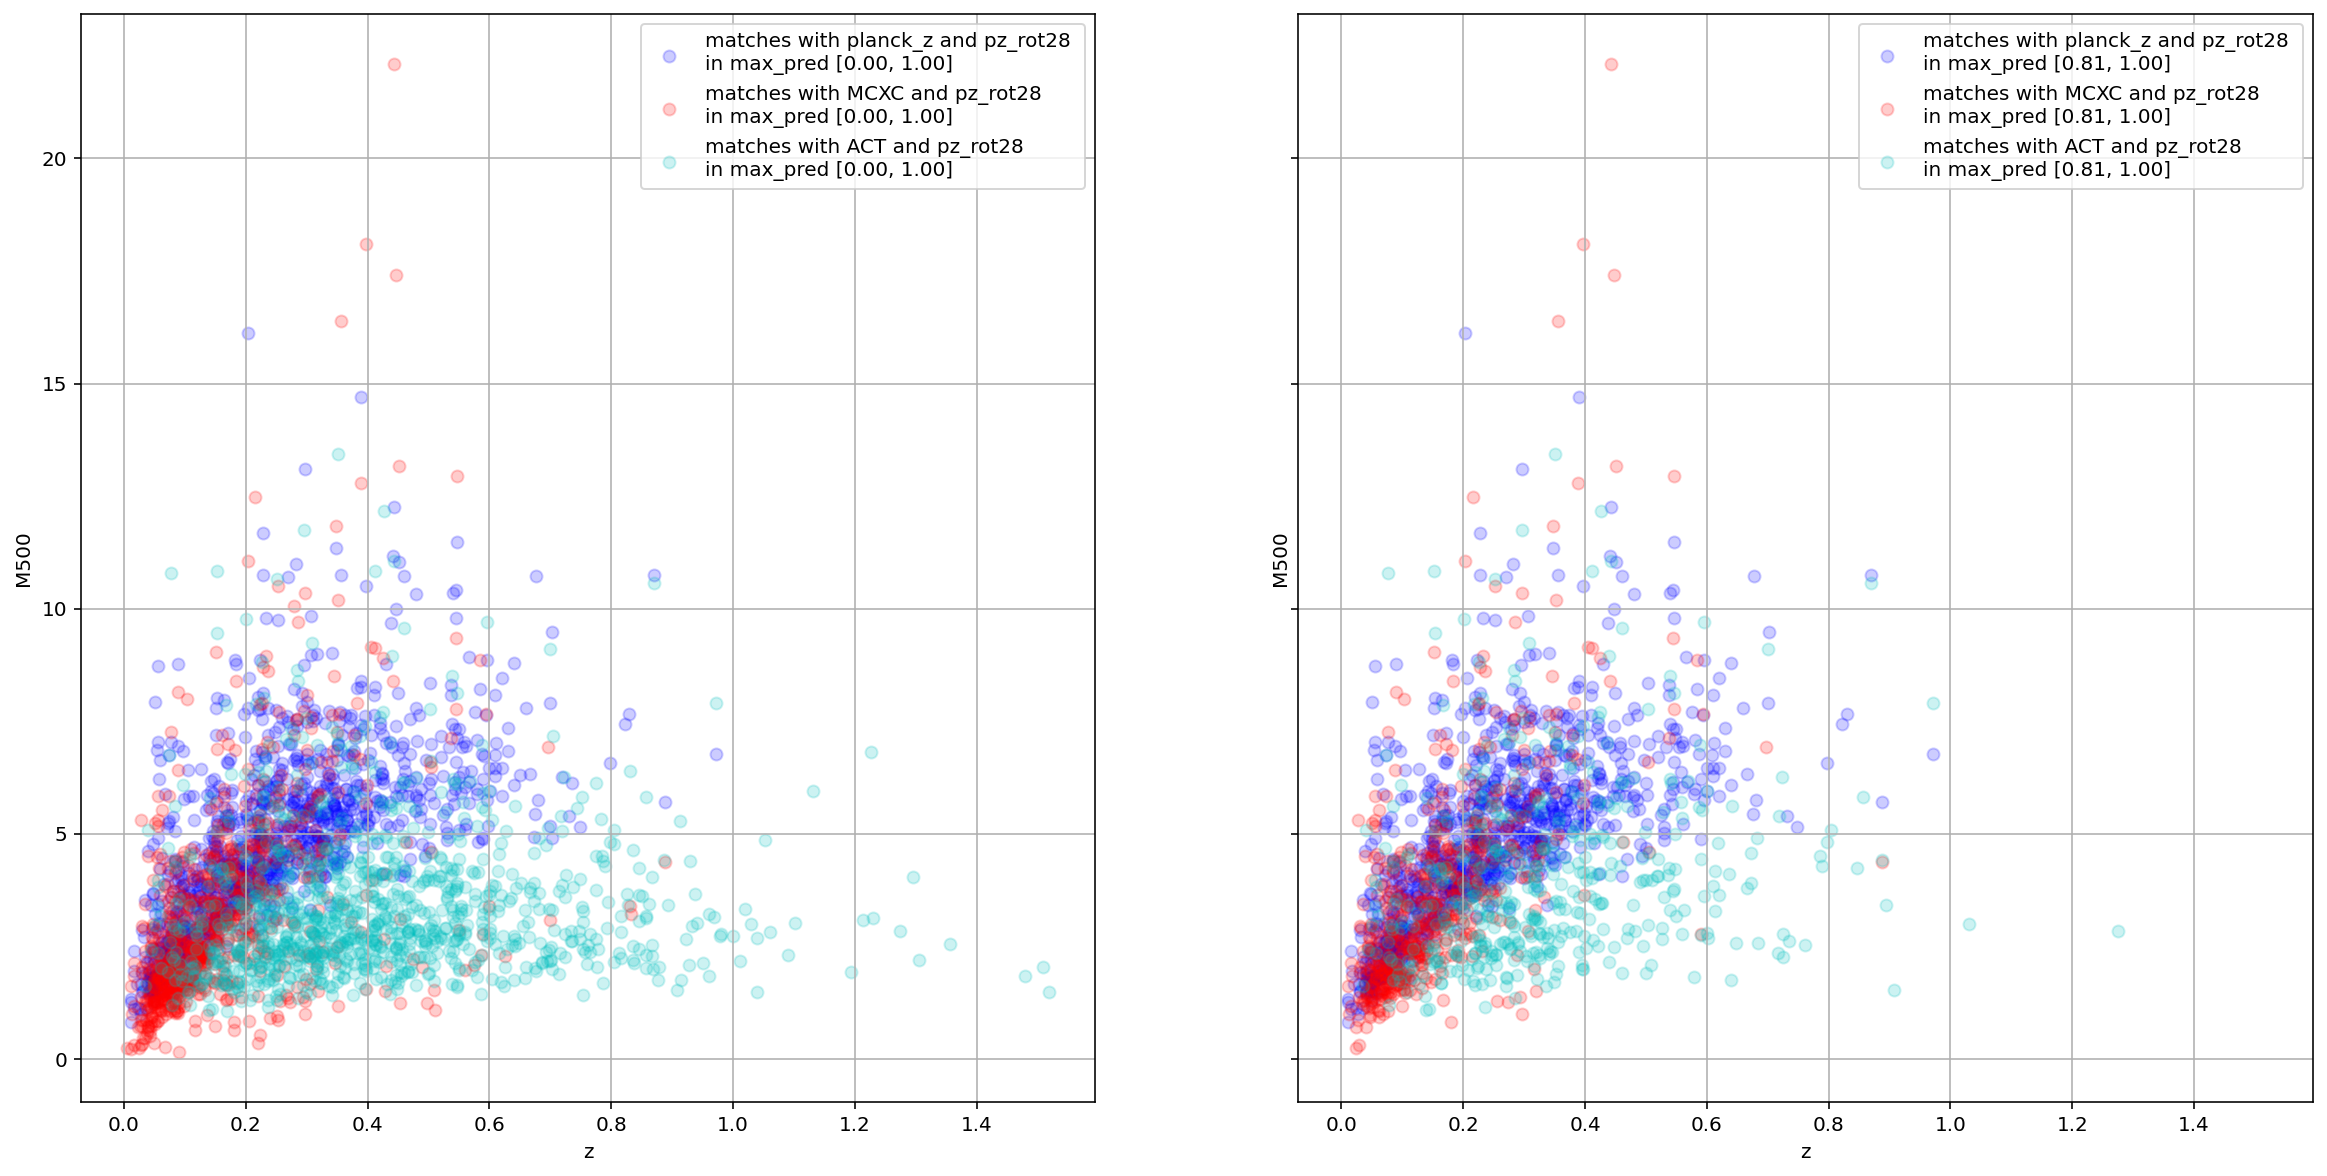

In [56]:
m500_z_graph('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn.csv', 'pz_rot28')

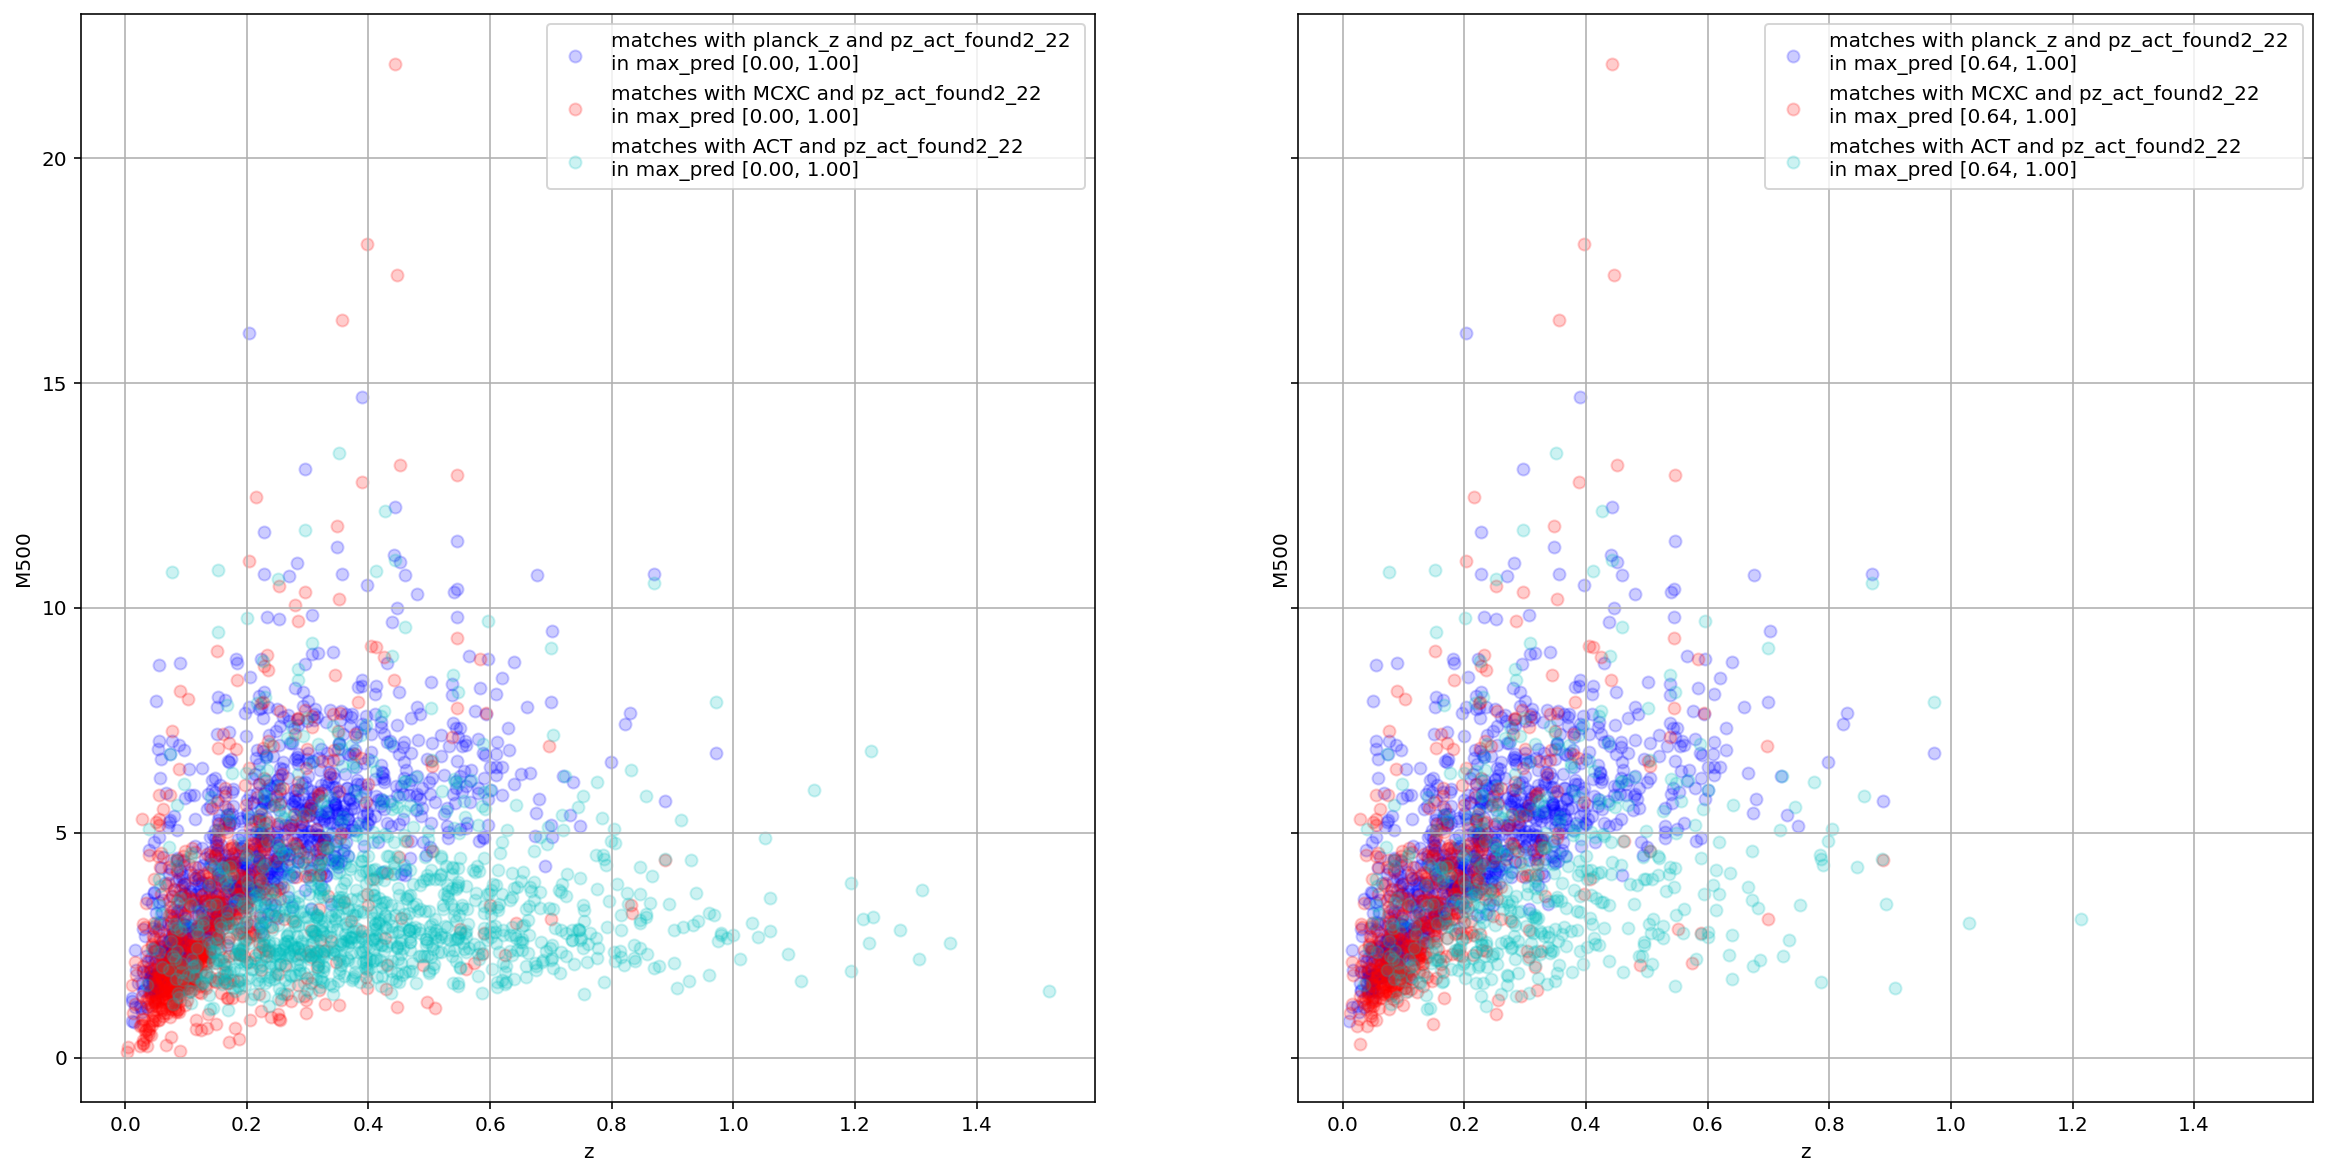

In [57]:
m500_z_graph('/home/rt2122/Data/detected_cats/full_pz_act_found2_22_thr0.1_step8_no_fn.csv', 'pz_act_found2_22')

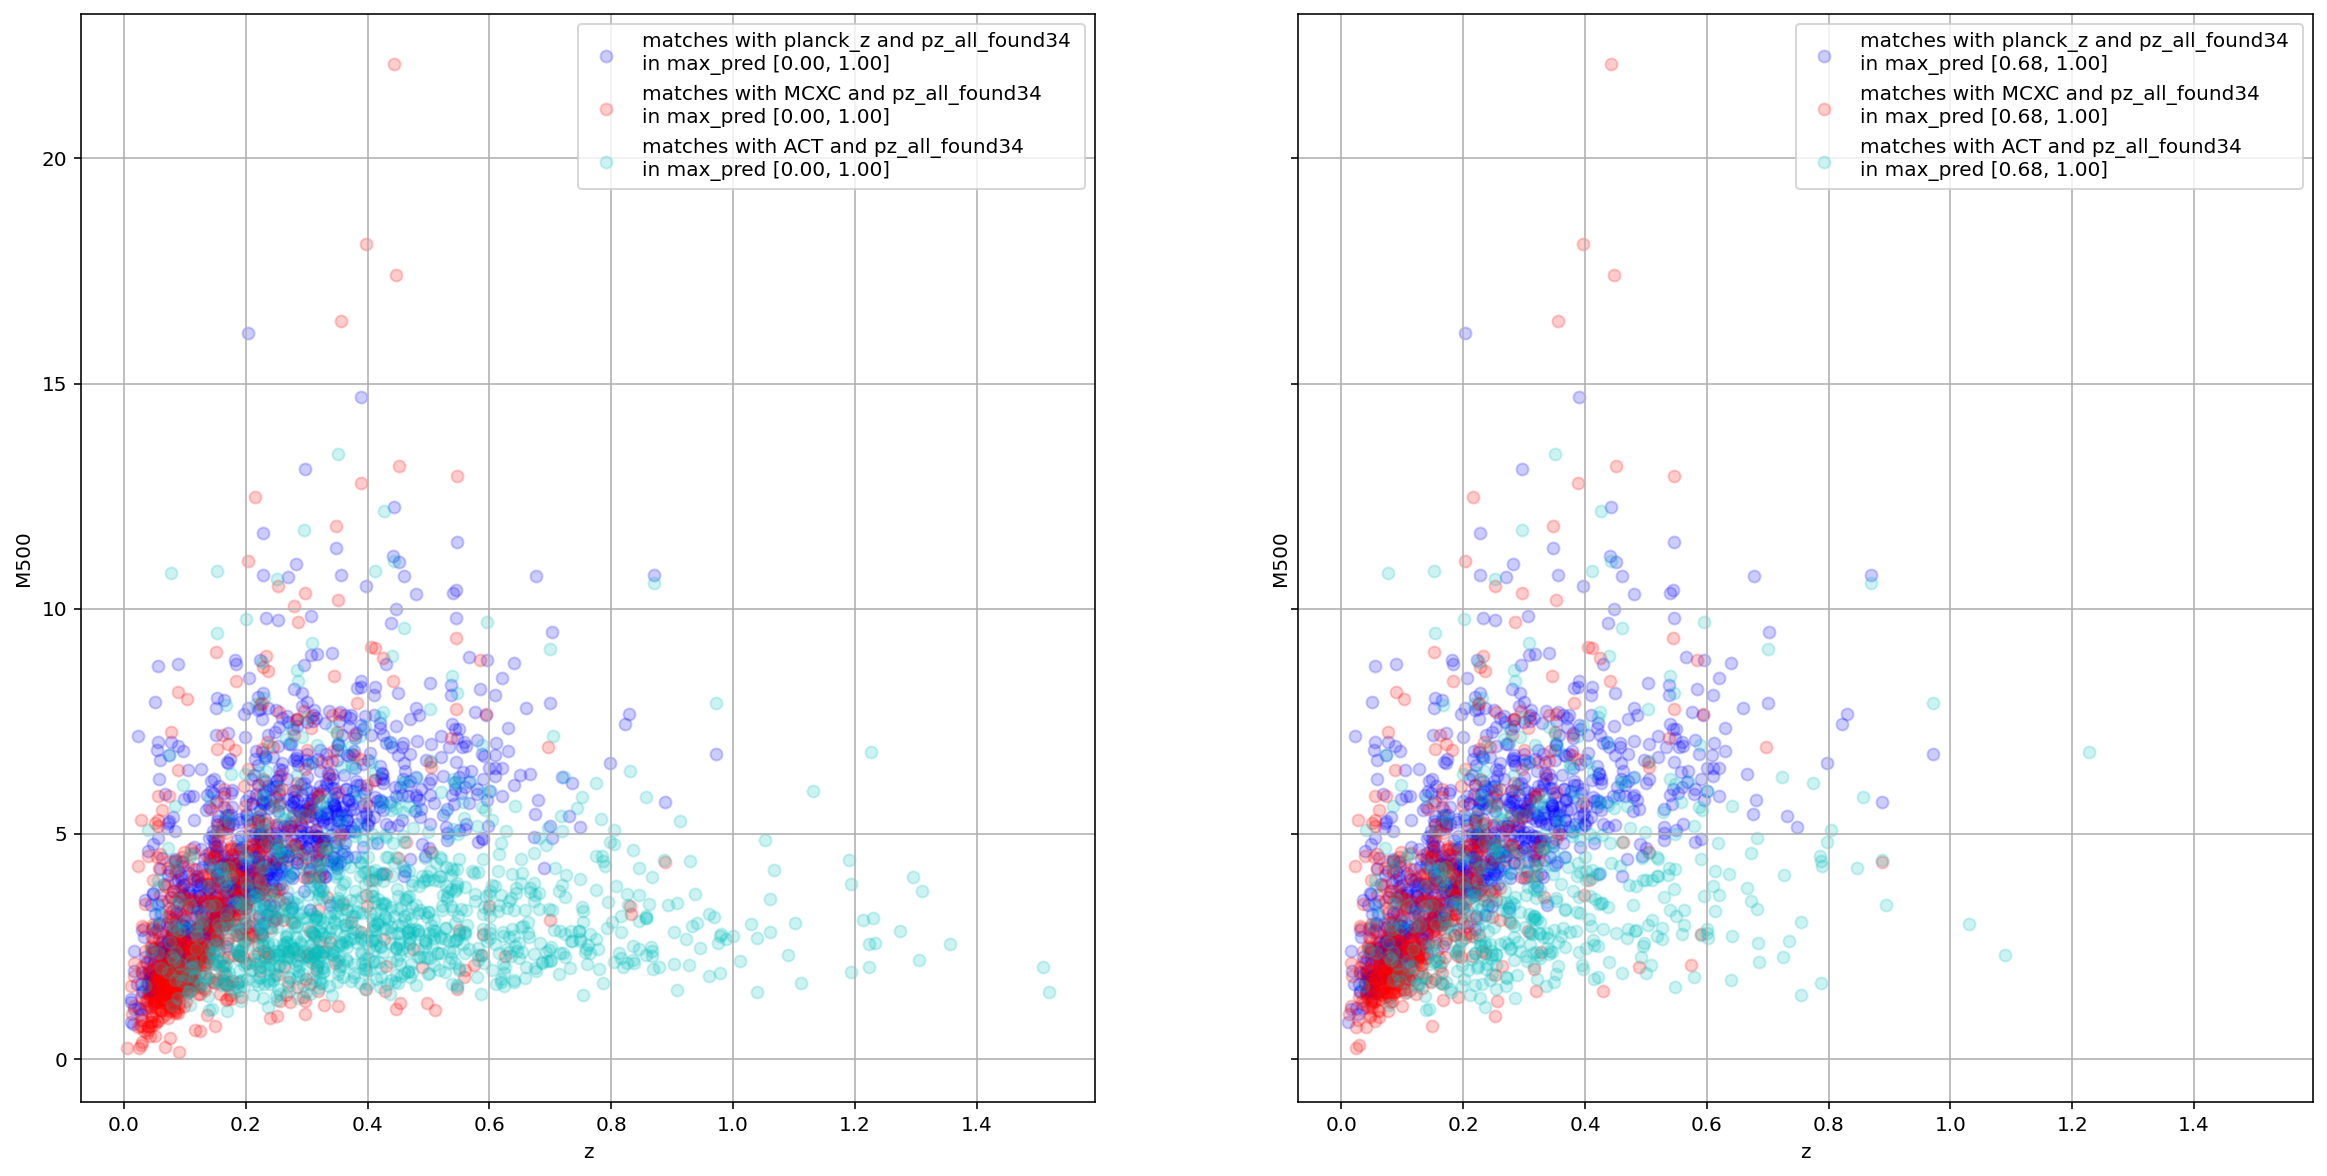

In [58]:
m500_z_graph('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv', 'pz_all_found34')

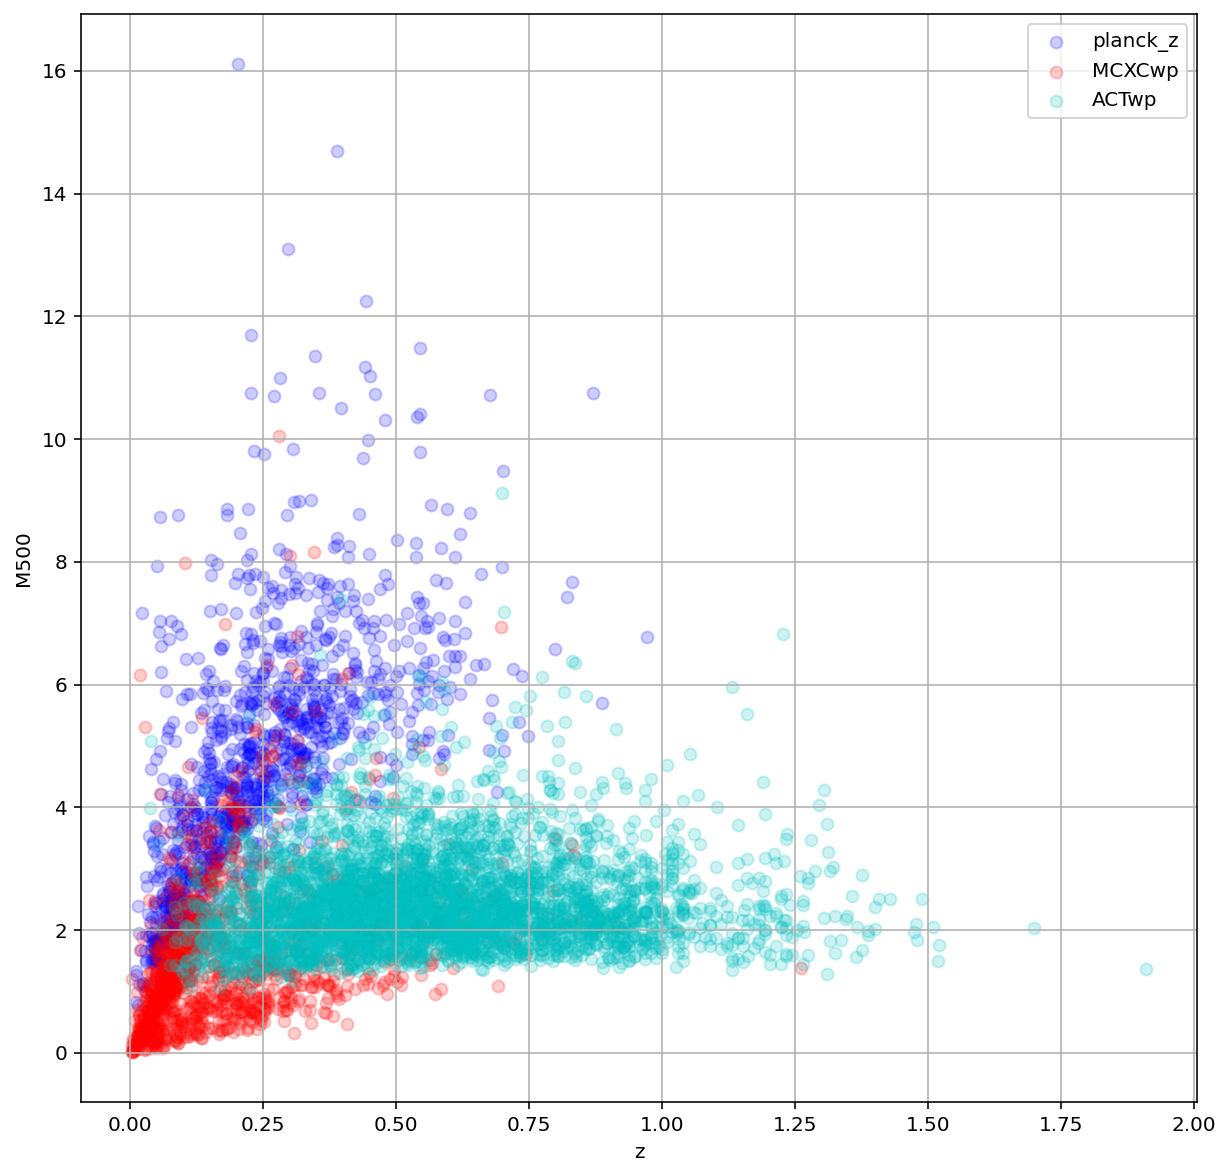

In [121]:
m500_z_graph('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn.csv', 'pz_rot28')

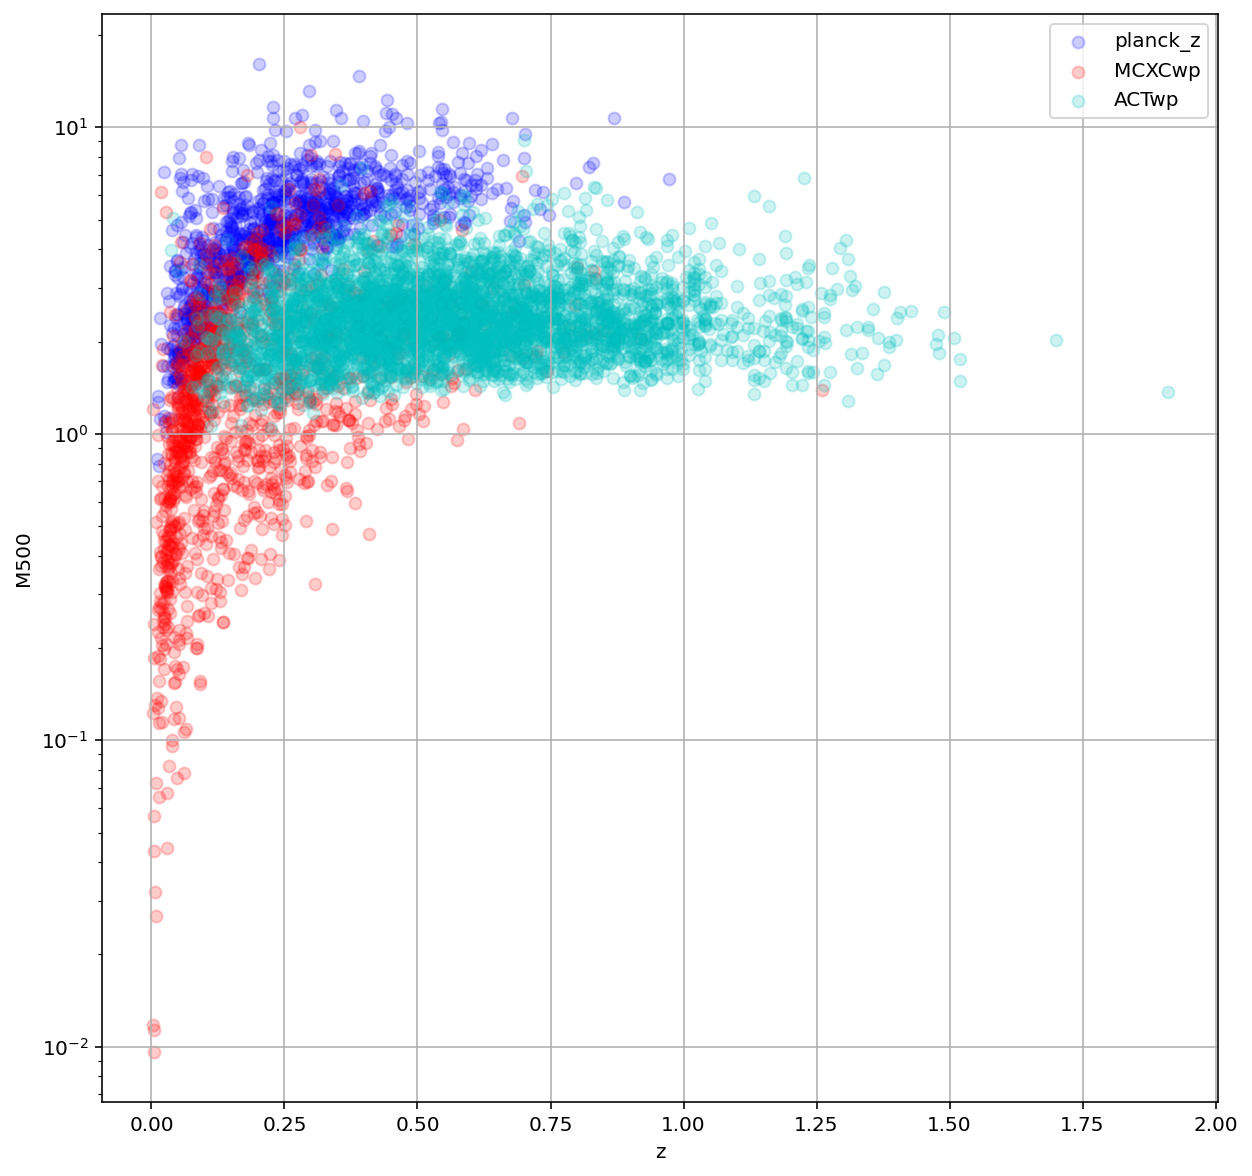

In [123]:
m500_z_graph('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn.csv', 'pz_rot28')

In [106]:
mcxc = pd.read_csv('/home/rt2122/Data/original_catalogs/csv/MCXC.csv')

In [107]:
planck_z = pd.read_csv('/home/rt2122/Data/clusters/planck_z.csv')

In [108]:
pz_sc = SkyCoord(ra=np.array(planck_z['RA']) * u.degree, dec=np.array(planck_z['DEC']) * u.degree, frame='icrs')
mcxc_sc = SkyCoord(ra=np.array(mcxc['RA']) * u.degree, dec=np.array(mcxc['DEC']) * u.degree, frame='icrs')

In [109]:
idx, d2d, _ = pz_sc.match_to_catalog_sky(mcxc_sc)
planck_z['mcxc_M500'] = 0
planck_z['mcxc_M500'] = np.array(mcxc['M500'][idx])
matched = d2d.degree < (400 / 3600)
planck_z = planck_z[matched]
planck_z.index = np.arange(len(planck_z))

In [84]:
mcxc

,RA,DEC,z,M500
248,47.233,26.760,0.356,16.4
322,64.393,-11.908,0.443,22.1
1592,332.941,-3.828,0.397,18.1
1635,340.839,-9.595,0.447,17.4


In [78]:
mcxc = mcxc[np.logical_not(matched)]
mcxc.index = np.arange(len(mcxc))
mcxc[mcxc['M500'] > 14]

,RA,DEC,z,M500


In [39]:
len(mcxc)

529

In [22]:
len(pd.read_csv('/home/rt2122/Data/original_catalogs/csv/MCXC.csv'))

1743

In [23]:
len(pd.read_csv('/home/rt2122/Data/clusters/mcxcwp.csv'))

1193

In [32]:
mcxc

,RA,DEC,z,M500
0,0.488,12.073,0.2033,2.6927
1,0.799,-6.086,0.2320,5.2188
2,0.961,2.063,0.0924,1.7342
3,1.513,-34.724,0.1147,2.7122
4,1.591,10.868,0.1698,2.9941
...,...,...,...,...
543,357.711,6.161,0.0562,1.9360
544,357.919,-26.084,0.2264,7.8996
545,358.556,-10.413,0.0765,2.3160
546,358.909,11.343,0.0726,1.6934


In [42]:
len(planck_z)

1094

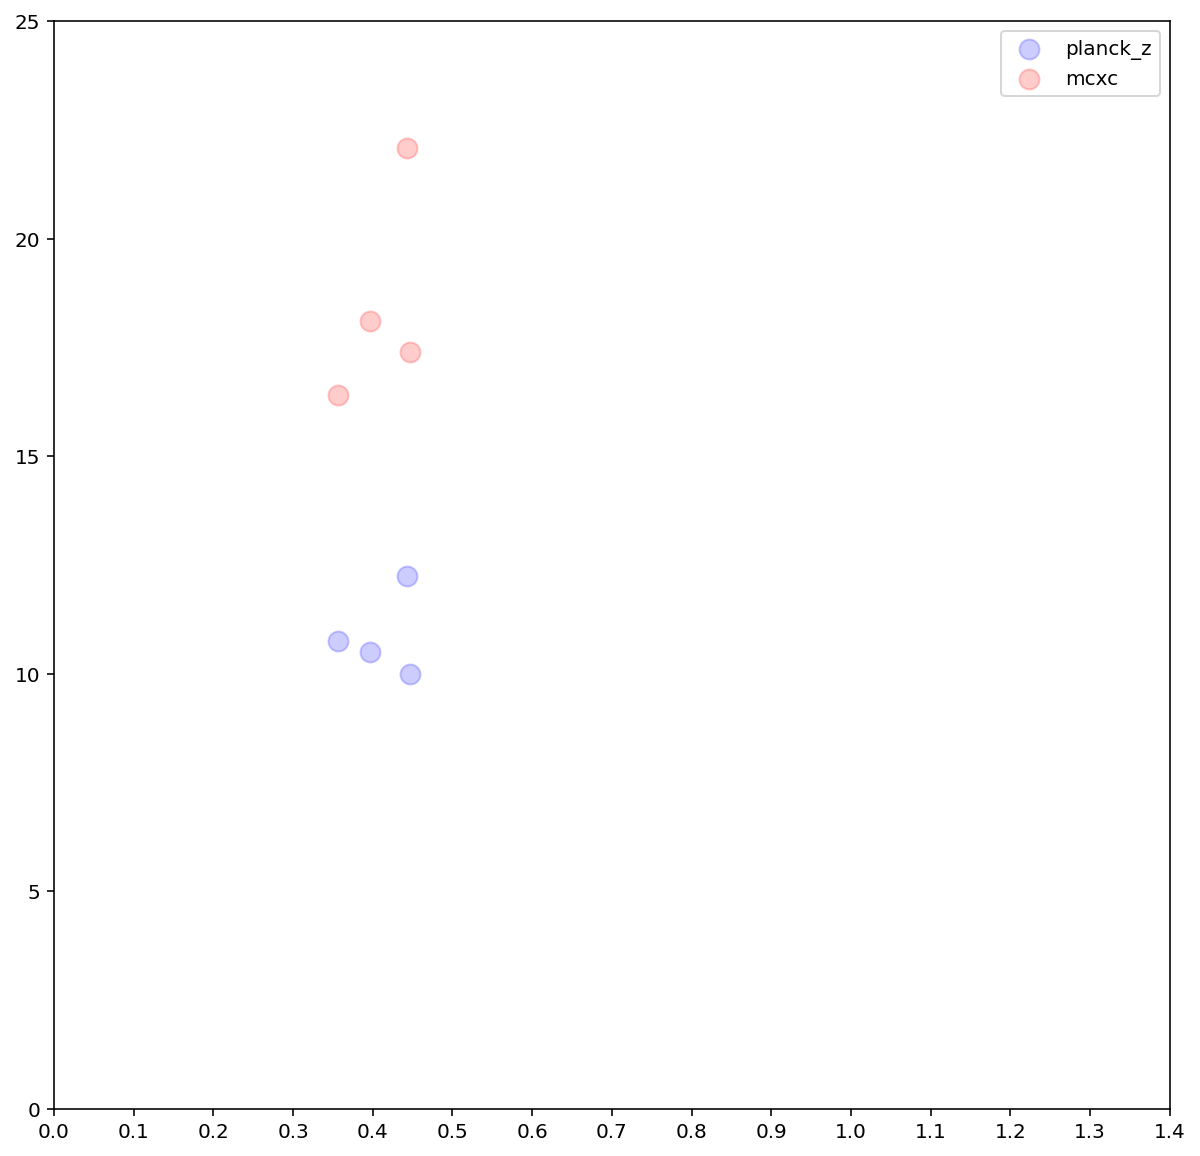

In [89]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))
s = ax.scatter(planck_z[matched]['z'], planck_z[matched]['M500'], c='b', alpha=0.2, s=100)
s.set_label('planck_z')
s = ax.scatter(mcxc['z'], mcxc['M500'], c='r', alpha=0.2, s=100)
s.set_label('mcxc')
ax.set_xticks(np.arange(0, 1.5, 0.1))
ax.set_yticks(np.arange(0, 30, 5))
ax.legend()

In [110]:
planck_z

,Name,RA,DEC,z,M500,MCXC,RedMAPPer,mcxc_M500
0,PSZ2 G000.04+45.13,229.190512,-1.017222,0.1198,3.962411,J1516.5-0056,RMJ151653.9-010506.3,2.2053
1,PSZ2 G000.13+78.04,203.558683,20.255990,0.1710,5.122391,J1334.1+2013,RMJ133408.7+201453.0,2.6730
2,PSZ2 G000.40-41.86,316.084485,-41.354169,0.1651,5.297053,J2104.3-4120,,4.1199
3,PSZ2 G000.77-35.69,307.972844,-40.598725,0.3416,6.333562,J2031.8-4037,,6.6240
4,PSZ2 G002.77-56.16,334.659473,-38.879406,0.1411,4.411132,J2218.6-3853,,3.9150
...,...,...,...,...,...,...,...,...
540,PSZ2 G357.75-41.77,315.929494,-43.325862,0.0487,1.546678,J2103.4-4319,,0.8373
541,PSZ2 G358.21-87.49,10.519321,-28.533385,0.1082,3.647853,J0042.1-2832,,3.5046
542,PSZ2 G358.94-70.57,352.780306,-36.549807,0.0957,2.523271,J2331.2-3630,,3.2815
543,PSZ2 G358.98-67.26,348.926557,-37.779104,0.1786,5.224710,J2315.7-3746,,4.5563


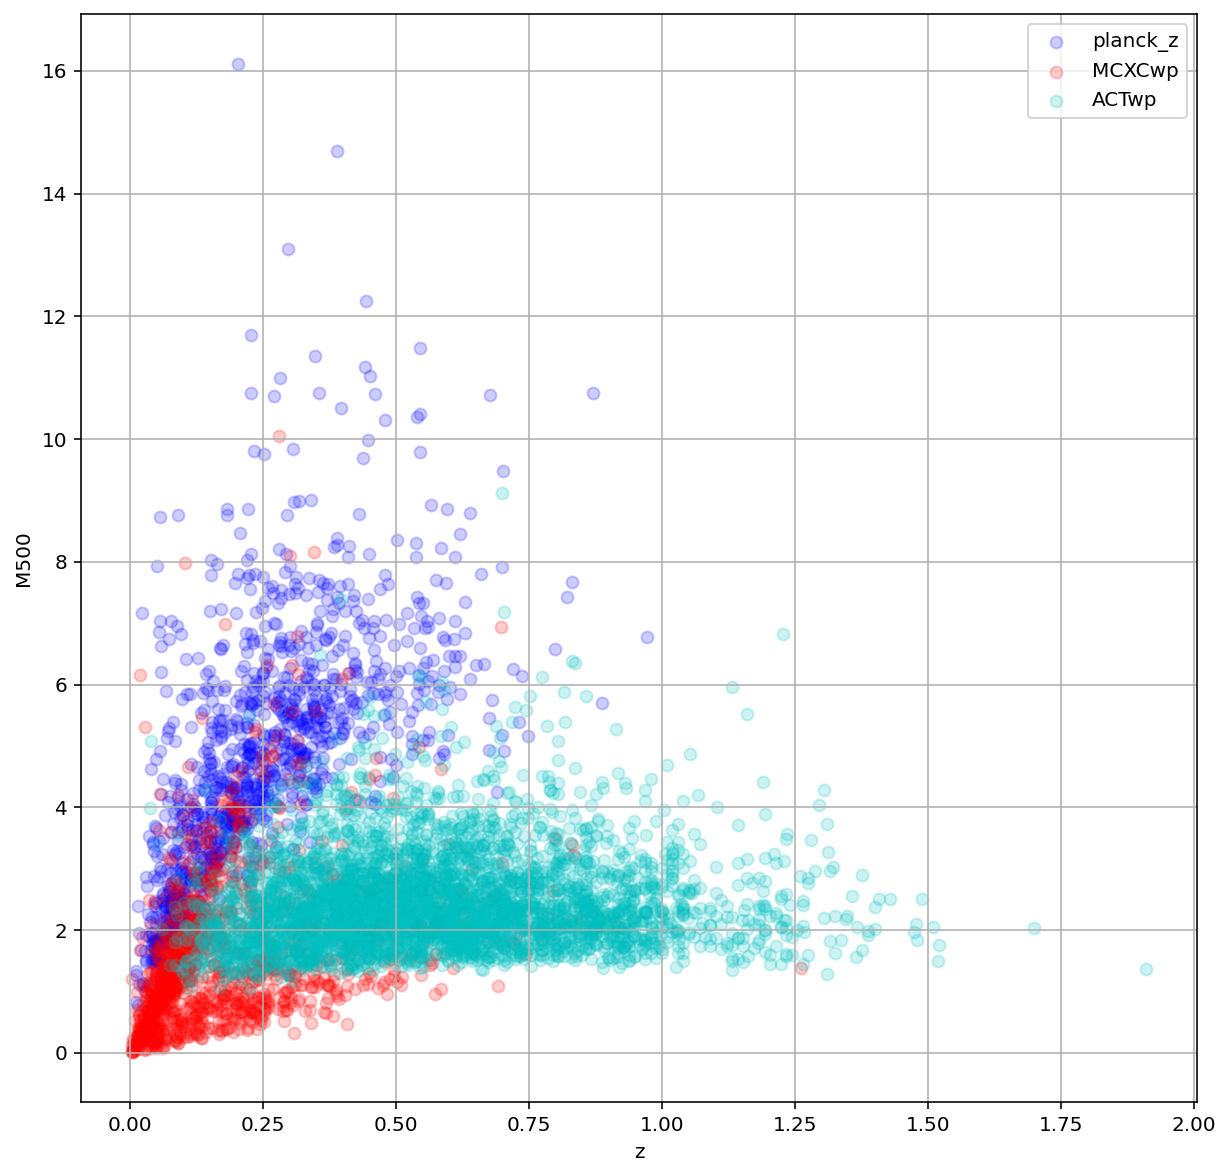

In [120]:
m500_z_graph('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn.csv', 'pz_rot28')

In [ ]:
m500_z_graph('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn.csv', 'pz_rot28')